# Wrangle and Analyze 'WeRateDogs' Data by WooYoung Yang
# (Act Report)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read 'twitter_archive_master.csv' and edit for plotting

In [2]:
tam = pd.read_csv('twitter_archive_master.csv')
tam.head(3)

,tweet_id,timestamp,rating(%),name,dogtionary,retweet_count,favorite_count,image_url,most_confident_prediction,confidence
0,666020888022790149,2015-11-15 22:32:08,80,None,NaN,517,2558,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,2015-11-15 23:05:30,70,a,NaN,46,129,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,2015-11-15 23:21:54,90,a,NaN,44,125,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461


In [3]:
tam_alt = tam.copy()

I need 'timestamp' for plotting.  
But I need to change it to datetime object.

In [4]:
type(tam_alt.loc[0, 'timestamp'])

str

In [5]:
tam_alt['timestamp'] = pd.to_datetime(tam_alt['timestamp'])

In [6]:
type(tam_alt.loc[0, 'timestamp'])

pandas._libs.tslib.Timestamp

In [7]:
tam_alt['timestamp'] = tam_alt['timestamp'].dt.date

All of 'datetime' convert to 'date' only (for plotting daily count).

In [8]:
tam_alt.head(3)

,tweet_id,timestamp,rating(%),name,dogtionary,retweet_count,favorite_count,image_url,most_confident_prediction,confidence
0,666020888022790149,2015-11-15,80,None,NaN,517,2558,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,2015-11-15,70,a,NaN,46,129,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,2015-11-15,90,a,NaN,44,125,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461


# Plotting

In [9]:
tam_date = tam_alt.groupby('timestamp').count()['tweet_id']
tam_date.head(3)

timestamp
2015-11-15     3
2015-11-16    18
2015-11-17    13
Name: tweet_id, dtype: int64

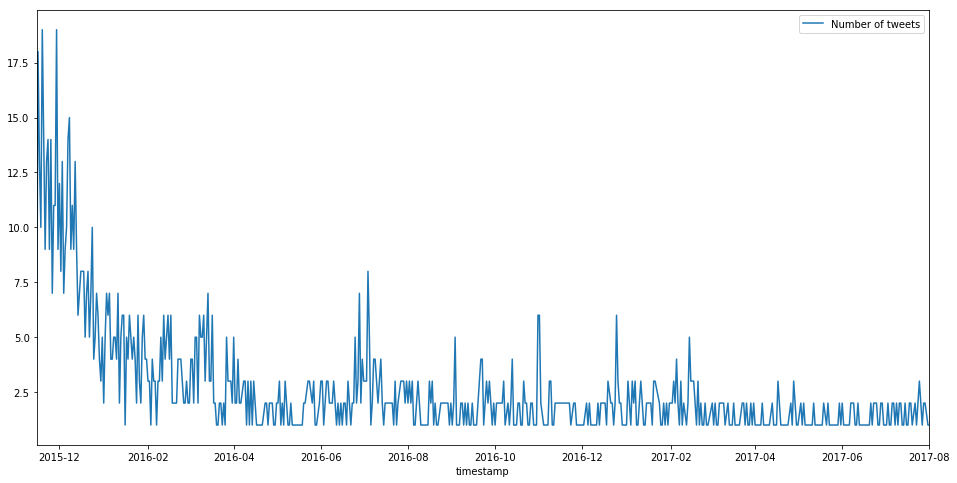

In [10]:
tam_date.plot(kind='line', figsize=(16, 8), label='Number of tweets', legend=True)
plt.show()
plt.clf()

It seems most tweeted dogs are concentrated in year 2015.  
The frequency of tweets sharply decreased by time elapsed.

In [11]:
tam_alt['most_confident_prediction'].value_counts()[0:10]

golden_retriever      136
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: most_confident_prediction, dtype: int64

In [12]:
tam_mcpt01 = tam_alt[tam_alt['most_confident_prediction'] == 'golden_retriever']
tam_mcpt02 = tam_alt[tam_alt['most_confident_prediction'] == 'Labrador_retriever']
tam_mcpt03 = tam_alt[tam_alt['most_confident_prediction'] == 'Pembroke']
tam_mcpt04 = tam_alt[tam_alt['most_confident_prediction'] == 'Chihuahua']
tam_mcpt05 = tam_alt[tam_alt['most_confident_prediction'] == 'pug']
tam_mcpt06 = tam_alt[tam_alt['most_confident_prediction'] == 'chow']
tam_mcpt07 = tam_alt[tam_alt['most_confident_prediction'] == 'Samoyed']
tam_mcpt08 = tam_alt[tam_alt['most_confident_prediction'] == 'Pomeranian']
tam_mcpt09 = tam_alt[tam_alt['most_confident_prediction'] == 'toy_poodle']
tam_mcpt10 = tam_alt[tam_alt['most_confident_prediction'] == 'malamute']

mcpt01 = tam_mcpt01.groupby('timestamp').count()['most_confident_prediction']
mcpt02 = tam_mcpt02.groupby('timestamp').count()['most_confident_prediction']
mcpt03 = tam_mcpt03.groupby('timestamp').count()['most_confident_prediction']
mcpt04 = tam_mcpt04.groupby('timestamp').count()['most_confident_prediction']
mcpt05 = tam_mcpt05.groupby('timestamp').count()['most_confident_prediction']
mcpt06 = tam_mcpt06.groupby('timestamp').count()['most_confident_prediction']
mcpt07 = tam_mcpt07.groupby('timestamp').count()['most_confident_prediction']
mcpt08 = tam_mcpt08.groupby('timestamp').count()['most_confident_prediction']
mcpt09 = tam_mcpt09.groupby('timestamp').count()['most_confident_prediction']
mcpt10 = tam_mcpt10.groupby('timestamp').count()['most_confident_prediction']

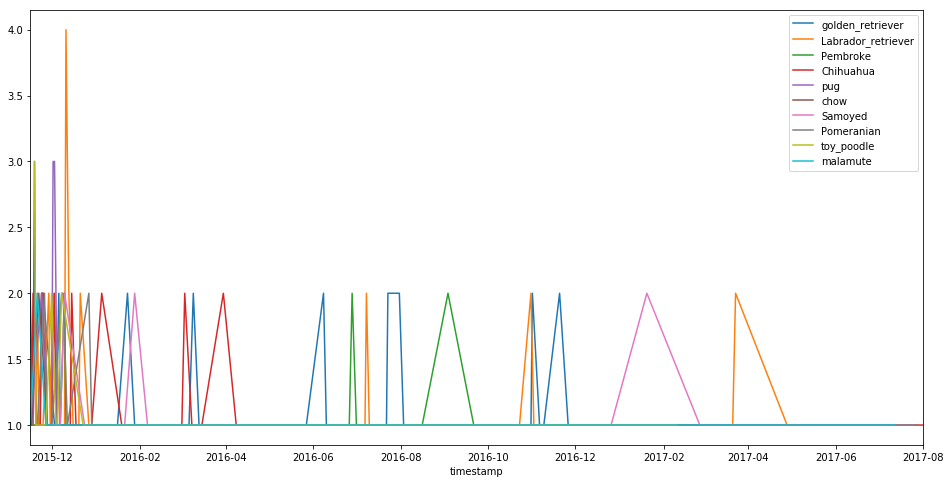

In [13]:
mcpt01.plot(kind='line', figsize=(16, 8), label='golden_retriever', legend=True)
mcpt02.plot(kind='line', figsize=(16, 8), label='Labrador_retriever', legend=True)
mcpt03.plot(kind='line', figsize=(16, 8), label='Pembroke', legend=True)
mcpt04.plot(kind='line', figsize=(16, 8), label='Chihuahua', legend=True)
mcpt05.plot(kind='line', figsize=(16, 8), label='pug', legend=True)
mcpt06.plot(kind='line', figsize=(16, 8), label='chow', legend=True)
mcpt07.plot(kind='line', figsize=(16, 8), label='Samoyed', legend=True)
mcpt08.plot(kind='line', figsize=(16, 8), label='Pomeranian', legend=True)
mcpt09.plot(kind='line', figsize=(16, 8), label='toy_poodle', legend=True)
mcpt10.plot(kind='line', figsize=(16, 8), label='malamute', legend=True)
plt.show()
plt.clf()

I picked ten most originally tweeted dogs.  
But frequency of tweets sharply decrease as same as above.  
Even ten most tweeted dogs, had no more than 2 tweets per one day, after year 2015.

In [14]:
rc = pd.Series(data=tam_alt['retweet_count'].values, index=tam_alt['timestamp'])
fc = pd.Series(data=tam_alt['favorite_count'].values, index=tam_alt['timestamp'])

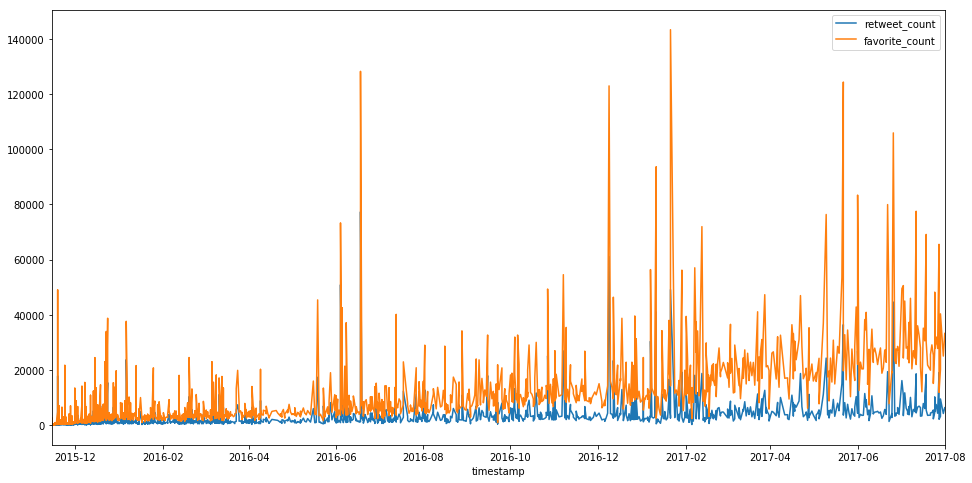

<function matplotlib.pyplot.clf>

In [15]:
rc.plot(kind='line', figsize=(16, 8), label='retweet_count', legend=True)
fc.plot(kind='line', figsize=(16, 8), label='favorite_count', legend=True)
plt.show()
plt.clf

By the way, 'retweet_count' and 'favorite_count' are increased by time elapsed.  
Especially, 'favorite_count' had sharply increased after december 2016.

Conclusion:  
Tweets seems decreased by time, but retweet count and favorite count are increased.  
In my opinion, the decrease of 'WeRateDogs' trend seem to affect the number of tweets.  
But past tweets are accumulated, and all user can easily surfing and tabbing favorite button.  
And perhaps, the whole user of twitter might be increased.  
I need more data to prove this opinion.